1. EDA (Exploratory Data Analysis)  
a) # Importa las librerias necesarias para el EDA  
b) # Importa el dataset ML_cars.csv a df0.  
c) # Consulta informacion del dataset.  
d) # Elimina las filas duplicadas de df0 y guarda el resultado en un nuevo DataFrame df1.  
e) # Dado que son 26 columnas, crea una lista con los encabezados para poder visualizarlos.  
f) # Separa el dataset df1 en 3 dataframes con car_ID: dfA (solo precio), dfB (solo atributos numericos) y dfC (solo atributos categoricos) 
2. dfA: Price  
g) # Detecta Outliers de precios con boxplot y calcula la mediana del precio.  
h) # Calcula la correlación entre las columnas del dataset con atributos numericos dfB y genera el Heatmap de correlacion. 
3. dfB: Atributos numericos  
i) # Crea la columna Area y la columna Volumen a partir de las dimensiones del vehiculo y calcula la correlacion (Heatmap)  
4. dfC: Atributos categoricos
j) # Convierte las variables categoricas de dfC a numericas utilizando LabelEncoder de sklearn.  
k) # Inserta la columna price en dfC, calcula la correlacion y grafica un Heatmap.  
5. RL con atributos polinomicos
6. Conclusiones

# 1-EDA

## a) Importa las librerias necesarias para el EDA y el dataset.

In [220]:
# Importa las librerias necesarias para el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [221]:
# Importa el dataset ML_cars.csv a df0
df0 = pd.read_csv("data/BBDD_Hospitalización.csv", sep=";")

## b) Consulta informacion del dataset. 

In [222]:
# Consulta informacion del dataset
df0.info()
df0.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    object 
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [255]:
df0.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,561.000000,565.000000,565.000000,565.000000
mean,63.870796,13.300303,13.001770,0.166372,0.014159
std,9.295538,15.705098,3.930919,0.960534,0.196993
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


La columna PSA presenta formato tipo Object en vez de Float.
Mismo caso para la columna 11, pero se puede omitir dicha columna para el analisis.
Se observan valores maximos de EDAD muy elevados, eliminar Oultiers.

In [223]:
# Reemplaza la coma por el punto en la columna 'PSA'
df0['PSA'] = df0['PSA'].str.replace(',', '.')
# Convierte la columna 'PSA' a un tipo numérico
df0['PSA'] = pd.to_numeric(df0['PSA'])
df0['PSA'].describe()

count    564.000000
mean      13.271401
std       15.668966
min        0.600000
25%        5.600000
50%        8.000000
75%       15.000000
max      100.000000
Name: PSA, dtype: float64

In [224]:
# Muestra la cantidad de registros con valores NaN:
# df0[df0.isnull().any(axis=1)]
num_nan = df0.isna().sum()
print(num_nan)


EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [225]:
# Elimina los NAN del target y muestra el detalle de los NAN restantes
df0 = df0.dropna(subset=['HOSPITALIZACION'])
df0[df0.isnull().any(axis=1)]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
76,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
92,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
99,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
106,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
115,56.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
116,55.0,NO,NO,17.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


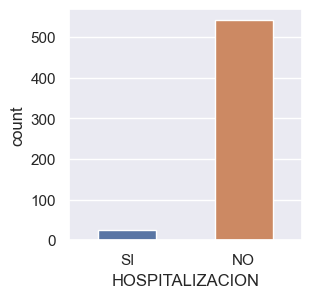

In [226]:
# Observamos cuántos casos hay de hospitalizacion y cuántos no
plt.figure(figsize = (3,3))
sns.countplot(x = 'HOSPITALIZACION', data = df0, width=0.5)
plt.show()


El dataset tiene 567 registros en 20 columnas. A efectos de realizar el analisis se pueden descartar 
el numero de muestras tomadas, el numero de dias postbiopsia y las ultimas 2 columnas que indican los dias de hospitalizacion.
El target esta desbalanceado, con undersampling en el valor que nos interesa, conviene balancear el dataset.
De los registros PSA con NAN, adopto la mediana para reemplazar el NAN.


## c) Define un dataset df2 solo con los valores necesarios para el analisis  

In [227]:
# Copia df0 a df1 eliminando las 4 columnas que no influyen en el resultado y descartando columnas con NAN
df1 = df0.drop(columns=['NUMERO DE MUESTRAS TOMADAS','NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA','DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'])
# df1.dropna()
print(df0.shape)
print(df1.shape)


(565, 20)
(565, 16)


In [228]:
# Reemplaza los NAN de PSA con el promedio de los valores de PSA.
PSA_mean = df1['PSA'].mean()    # Calcula el promedio de PSA
df1["PSA"].fillna(value=PSA_mean, inplace=True) # Reemplaza los NAN con el promedio
num_nan = df1.isna().sum()
print(num_nan)

EDAD                                        0
DIABETES                                    0
HOSPITALIZACIÓN ULTIMO MES                  0
PSA                                         0
BIOPSIAS PREVIAS                            2
VOLUMEN PROSTATICO                          1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS     0
CUP                                         1
ENF. CRONICA PULMONAR OBSTRUCTIVA           2
BIOPSIA                                     0
FIEBRE                                      0
ITU                                         0
TIPO DE CULTIVO                             0
AGENTE AISLADO                             17
PATRON DE RESISTENCIA                       0
HOSPITALIZACION                             0
dtype: int64


In [229]:
# Elimina los registros con NAN y cuenta los valores unicos de cada columna
df1 = df1.dropna()
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 564
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     545 non-null    float64
 1   DIABETES                                 545 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES               545 non-null    object 
 3   PSA                                      545 non-null    float64
 4   BIOPSIAS PREVIAS                         545 non-null    object 
 5   VOLUMEN PROSTATICO                       545 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  545 non-null    object 
 7   CUP                                      545 non-null    object 
 8   ENF. CRONICA PULMONAR OBSTRUCTIVA        545 non-null    object 
 9   BIOPSIA                                  545 non-null    object 
 10  FIEBRE                                   545 non-n

Hasta aqui se eliminaron las columnas innecesarias y los NAN.
A continuacion vamos a simplificar el dataset corrigiendo errores y reduciendo las variables a binarias en df2.

In [230]:
df2 = df1

In [231]:
# Cuenta cantidad de valores distintos de la columna
df2['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].value_counts()

FLUOROQUINOLONA_AMINOGLICOSIDO    430
CEFALOSPORINA_AMINOGLUCOCIDO       55
OTROS                              41
OROQUINOLONAS                      17
FLUOROQUINOLONA_AMINOGLICÓSIDO      2
Name: ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS, dtype: int64

In [233]:
# Corrige los errores
df2['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace(['FLUOROQUINOLONA_AMINOGLICÓSIDO'],['FLUOROQUINOLONA_AMINOGLICOSIDO'], inplace=True)
df2.rename(columns={'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIB EN PROFILAXIS'}, inplace=True)
df2['ANTIB EN PROFILAXIS'].value_counts()

FLUOROQUINOLONA_AMINOGLICOSIDO    432
CEFALOSPORINA_AMINOGLUCOCIDO       55
OTROS                              41
OROQUINOLONAS                      17
Name: ANTIB EN PROFILAXIS, dtype: int64

In [235]:
# Cuenta cantidad de valores distintos de la columna
df2['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

NO          527
SI           12
SI, EPOC      3
SI, ASMA      3
Name: ENF. CRONICA PULMONAR OBSTRUCTIVA, dtype: int64

In [236]:
# Agrupa los SI para simplificar
df2['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(['SI, EPOC'],['SI'], inplace=True)
df2['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(['SI, ASMA'],['SI'], inplace=True)
df2['ENF. CRONICA PULMONAR OBSTRUCTIVA'].value_counts()

NO    527
SI     18
Name: ENF. CRONICA PULMONAR OBSTRUCTIVA, dtype: int64

In [237]:
# Cuenta cantidad de valores distintos de la columna
df2['TIPO DE CULTIVO'].value_counts()

NO                          537
UROCULTIVO                    4
HEMOCULTIVO                   2
HEMOCULTIVO Y UROCULTIVO      2
Name: TIPO DE CULTIVO, dtype: int64

In [238]:
# Agrupa los SI para simplificar
df2['TIPO DE CULTIVO'].replace(['UROCULTIVO'],['SI'], inplace=True)
df2['TIPO DE CULTIVO'].replace(['HEMOCULTIVO'],['SI'], inplace=True)
df2['TIPO DE CULTIVO'].replace(['HEMOCULTIVO Y UROCULTIVO'],['SI'], inplace=True)
df2.rename(columns={'TIPO DE CULTIVO':'CULTIVO'}, inplace=True)
df2['CULTIVO'].value_counts()

NO    537
SI      8
Name: CULTIVO, dtype: int64

In [239]:
# Cuenta cantidad de valores distintos de la columna
df2['AGENTE AISLADO'].value_counts()

NO                        537
E.COLI                      6
PSEUDOMONAS AERUGINOSA      2
Name: AGENTE AISLADO, dtype: int64

In [240]:
# Agrupa los SI para simplificar
df2['AGENTE AISLADO'].replace(['E.COLI'],['SI'], inplace=True)
df2['AGENTE AISLADO'].replace(['PSEUDOMONAS AERUGINOSA'],['SI'], inplace=True)
df2['AGENTE AISLADO'].value_counts()

NO    537
SI      8
Name: AGENTE AISLADO, dtype: int64

In [79]:
# Cuenta cantidad de valores distintos de la columna
df2['PATRON DE RESISTENCIA'].value_counts()

NO                                                                                 561
RESISTENTE A AMPI, CIPRO Y GENTA                                                     2
RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA      2
MULTI SENSIBLE                                                                       2
 AMPI R, CIPRO R, GENTA R, SULFA M R                                                 1
Name: PATRON DE RESISTENCIA, dtype: int64

In [241]:
# Agrupa los SI para simplificar
df2['PATRON DE RESISTENCIA'].replace(['RESISTENTE A AMPI, CIPRO Y GENTA'],['SI'], inplace=True)
df2['PATRON DE RESISTENCIA'].replace(['RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA'],['SI'], inplace=True)
df2['PATRON DE RESISTENCIA'].replace(['MULTI SENSIBLE'],['SI'], inplace=True)
df2['PATRON DE RESISTENCIA'].replace([' AMPI R, CIPRO R, GENTA R, SULFA M R'],['SI'], inplace=True)
df2.rename(columns={'PATRON DE RESISTENCIA':'RESISTENCIA'}, inplace=True)
df2['RESISTENCIA'].value_counts()

NO    538
SI      7
Name: RESISTENCIA, dtype: int64

In [242]:
# Cuenta cantidad de valores distintos de la columna
df2['BIOPSIA'].value_counts()

NEG                                           306
ADENOCARCINOMA GLEASON 7                      100
ADENOCARCINOMA GLEASON 6                       38
ADENOCARCINOMA GLEASON 8                       22
ADENOCARCINOMA GLEASON 9                       20
ADENOCARCINOMA GLEASON 6                       16
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         14
ADENOCARCINOMA GLEASON 7                        9
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: BIOPSIA, dtype: int64

In [243]:
df2['BIOPSIA'].info()

<class 'pandas.core.series.Series'>
Int64Index: 545 entries, 0 to 564
Series name: BIOPSIA
Non-Null Count  Dtype 
--------------  ----- 
545 non-null    object
dtypes: object(1)
memory usage: 8.5+ KB


In [253]:
# # Agrupa los ADENOCARCINOMA GLEASON para simplificar
df2['BIOPSIA'].replace(['ADENOCARCINOMA GLEASON 6 '],['ADENOCARCINOMA GLEASON'], inplace=True)
df2['BIOPSIA'].replace(['ADENOCARCINOMA GLEASON 7 '],['ADENOCARCINOMA GLEASON'], inplace=True)
df2['BIOPSIA'].replace(['ADENOCARCINOMA GLEASON 8 '],['ADENOCARCINOMA GLEASON'], inplace=True)
df2['BIOPSIA'].replace(['ADENOCARCINOMA GLEASON 9 '],['ADENOCARCINOMA GLEASON'], inplace=True)
df2['BIOPSIA'].replace(['ADENOCARCINOMA GLEASON 10 '],['ADENOCARCINOMA GLEASON'], inplace=True)
df2['BIOPSIA'].value_counts()

NEG                                           306
ADENOCARCINOMA GLEASON                        209
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         14
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: BIOPSIA, dtype: int64

Text(0, 0.5, 'Edad')

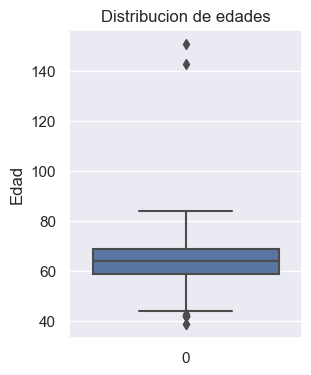

In [256]:
# Graficamos para ver los Oultiers de EDAD
# Detecta Outliers de edad con boxplot
plt.figure(figsize = (3,4))
sns.boxplot(data=df2['EDAD'])
plt.title('Distribucion de edades', fontsize = 12)
plt.ylabel('Edad')

Text(0, 0.5, 'Edad')

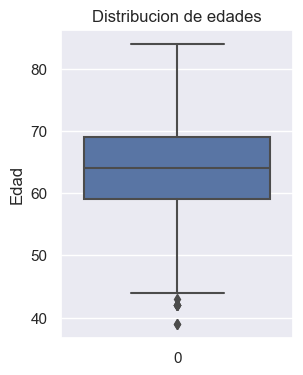

In [257]:
# Eliminamos los outliers de edades dado que son 2 casos de NO hospitalizacion, y hay un sobremuestreo.
df3 = df2.drop(df2[df2['EDAD'] > 100].index)
plt.figure(figsize = (3,4))
sns.boxplot(data=df3['EDAD'])
plt.title('Distribucion de edades', fontsize = 12)
plt.ylabel('Edad')

In [258]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 564
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               543 non-null    float64
 1   DIABETES                           543 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         543 non-null    object 
 3   PSA                                543 non-null    float64
 4   BIOPSIAS PREVIAS                   543 non-null    object 
 5   VOLUMEN PROSTATICO                 543 non-null    object 
 6   ANTIB EN PROFILAXIS                543 non-null    object 
 7   CUP                                543 non-null    object 
 8   ENF. CRONICA PULMONAR OBSTRUCTIVA  543 non-null    object 
 9   BIOPSIA                            543 non-null    object 
 10  FIEBRE                             543 non-null    object 
 11  ITU                                543 non-null    object 

## f) Convierte atributos categoricos en numericos en un nuevo df3 
Primero separo las columnas numericas EDAD y PSA.
Luego convierto los atributos categoricos a numericos
Finalmente uno los 2 dataframes

In [260]:
encabezados = list(df3.columns)
print(encabezados)

['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIB EN PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU', 'CULTIVO', 'AGENTE AISLADO', 'RESISTENCIA', 'HOSPITALIZACION']


In [261]:
dfA = df3[['EDAD','PSA']]
dfB = df3[['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIB EN PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU', 'CULTIVO', 'AGENTE AISLADO', 'RESISTENCIA', 'HOSPITALIZACION']]

In [263]:
# Convierte las variables categoricas a numericas utilizando LabelEncoder de sklearn.
from sklearn.preprocessing import LabelEncoder

# Aplicar LabelEncoder a cada columna
le = LabelEncoder()
for column in dfB.columns:
    dfB[column] = le.fit_transform(dfB[column])

dfB.head()


/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_7664/494335766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB[column] = le.fit_transform(dfB[column])
/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_7664/494335766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfB[column] = le.fit_transform(dfB[column])
/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_7664/494335766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIB EN PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,CULTIVO,AGENTE AISLADO,RESISTENCIA,HOSPITALIZACION
0,0,0,0,1,1,0,0,3,1,0,0,0,0,1
1,0,0,0,1,1,0,0,3,1,0,0,0,0,1
2,0,0,1,1,1,0,0,3,1,0,1,1,1,1
3,0,0,0,1,1,0,0,3,1,0,0,0,0,1
4,0,0,1,1,1,0,0,3,1,0,1,1,0,1


In [264]:
# Agrego las columnas numericas
dfC = pd.concat([dfB, dfA], axis=1)
dfC.head()

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIB EN PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,CULTIVO,AGENTE AISLADO,RESISTENCIA,HOSPITALIZACION,EDAD,PSA
0,0,0,0,1,1,0,0,3,1,0,0,0,0,1,12,10
1,0,0,0,1,1,0,0,3,1,0,0,0,0,1,15,51
2,0,0,1,1,1,0,0,3,1,0,1,1,1,1,16,122
3,0,0,0,1,1,0,0,3,1,0,0,0,0,1,15,45
4,0,0,1,1,1,0,0,3,1,0,1,1,0,1,14,122


<Axes: >

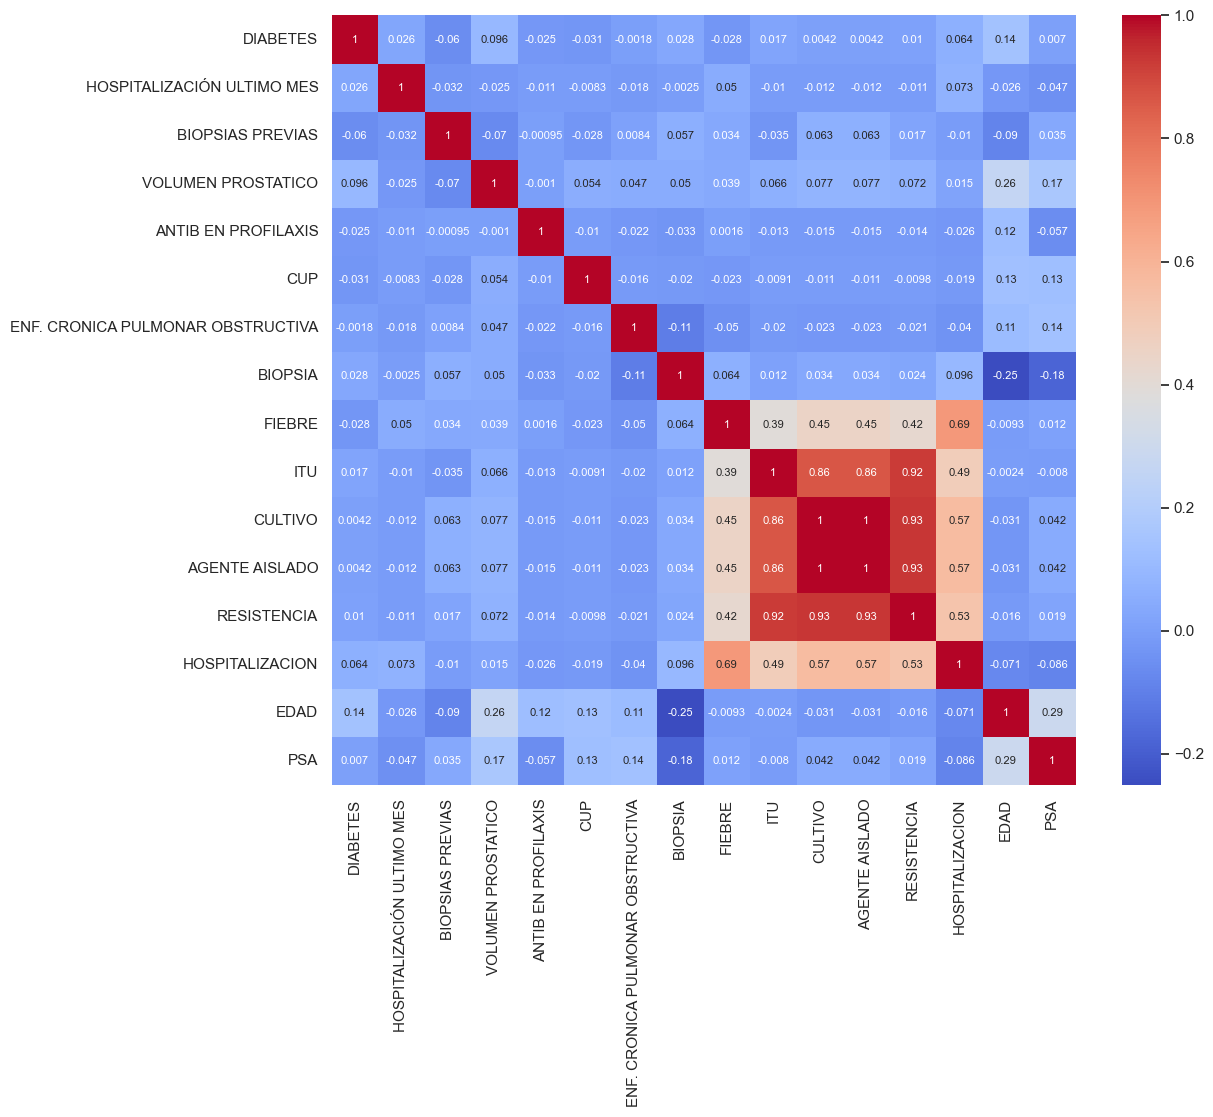

In [265]:
# Calcula la correlacion y grafica un Heatmap.
corr_matrix_dfC = dfC.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_dfC, cmap='coolwarm', annot=True, annot_kws={'size': 8})

Se observa redundancia entre CULTIVO y AGENTE AISLADO luego de conversion a binario. Infiero que AGENTE AISLADO deriva del TIPO DE CULTIVO
RESISTENCIA binaria tiene alta correlacion con ITU, CULTIVO y AGENTE AISLADO. Sin embargo no lo considero redundante.
El coeficiente de Pearson para HOSPITALIZACION es mas alto con FIEBRE

# 6-Conclusiones

Finalizado el EDA podemos obtener las siguientes conclusiones:  
a) # El dataset original se compone de 570 registros en 20 columnas. El Target HOSPITALIZACION es categorico.  
b) # El rango intercuatril parece estar entre 7500 y 17000, con outliers por encima de 28000.  
c) # Dado que parece haber continuidad entre los outliers superiores, conviene encontrar categorias para clasificar los rangos de precios.  
d) # Se podria emplear algun modeo de clasificacion para obtener las categorias (ver archivo 2-Data Preparation.ipynb).  
e) # Se observa alta correlacion de precio con enginesize (0.87), curbweight (0.84) y horsepower (0.81).  
f) # Caben mencionar la correlacion con carwidth (0.76) y carlength (0.68).  
g) # Tambien hay una correlacion inversa con highwaympg (-0.7) y citympg (-0.69).  
h) # No se observan correlaciones significativas con variables categoricas.  
i) # La mediana del precio es 10295 y la media 13276.  
